In [2]:
%load_ext autoreload
%autoreload 2

import cstrees.cstree as ct
import numpy as np
import networkx as nx
import random
import pandas as pd
import time

DEBUG:matplotlib:matplotlib data path: /home/f/l/flrios/git/CStrees/cstree_env/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/f/l/flrios/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux


X3 ⊥  X4, X1=1, X2=1; probs: [0.11277399 0.88722601]


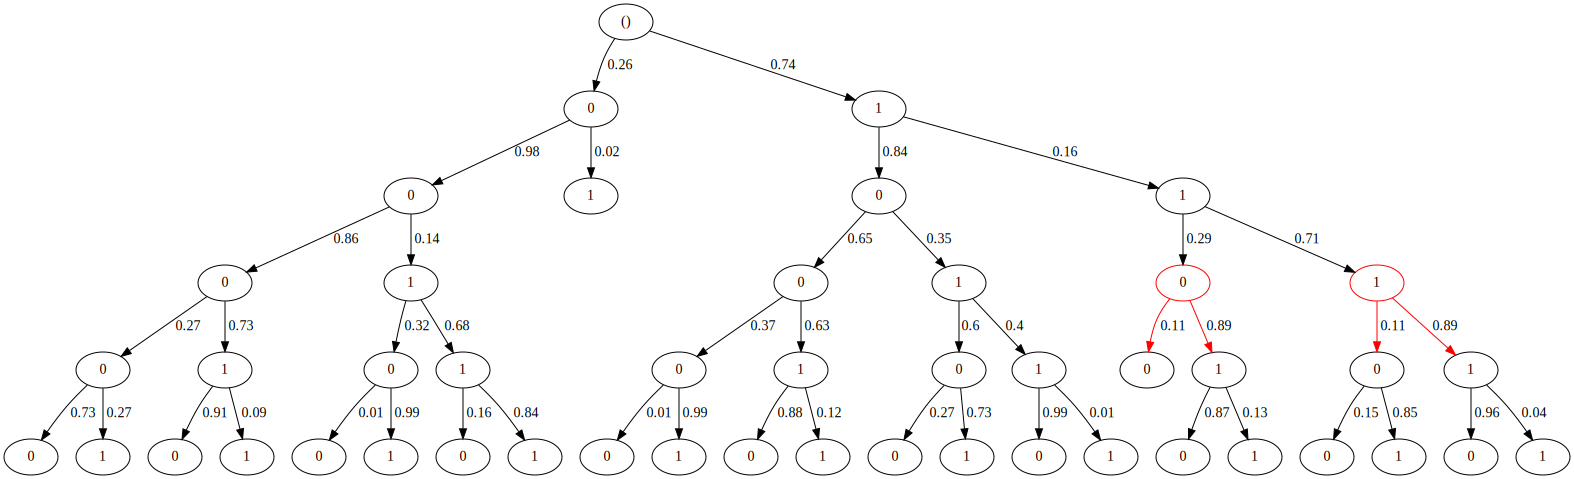

In [3]:
import numpy as np
np.random.seed()
p = 5
co = ct.CausalOrder(range(1, p+1))
tree = ct.CStree(co)
cards = [2] * p
tree.set_cardinalities([None] + cards)

stage = ct.sample_random_stage(cards, level=3, max_contextvars=3, prob=0.99)
stage.set_random_params(cards)

stage.color = "red"
print(stage)

tree.set_stages({3:[stage]}) # should it have to be l
x = tree.sample(100)
#print(x)
a = tree.plot()
a

In [ ]:
np.random.choice(2,2, replace=False)

In [4]:
cdags = tree.to_minimal_context_graphs()
for key, graph in cdags.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw("minl_cont_dag_"+str(key) + ".png", args="-Glabel="+str(key)+"    ")

DEBUG:root:getting csirels per level
DEBUG:root:
#### Level 0
DEBUG:root:
#### Level 1
DEBUG:root:
#### Level 2
DEBUG:root:
#### Level 3
DEBUG:root:
#### Iteration 1
DEBUG:root:level 1
DEBUG:root:level 2
DEBUG:root:level 3
DEBUG:root:##### Iterated through all levels. Prepare for next round. ### 
 
DEBUG:root:Adding the following newbies (newly created in earlier interations) to the oldies.
DEBUG:root:[None, {1}, {1}, None, None]
DEBUG:root:CSI to absorb/remove after having been mixed (can be duplicates)
DEBUG:root:New mix results:
DEBUG:root:Updating mix results by removing if they already are in oldies, or a subset of an oldie.
DEBUG:root:newbies (new mixes after the filtering):
DEBUG:root:oldies
DEBUG:root:[None, {1}, {1}, None, None]
DEBUG:root:
#### Level 4


rels
minl cslisist
get minl csis


OSError: Error: neato: can't open X2=1: No such file or directory


In [ ]:
tree.to_df()

In [ ]:
x = tree.sample(10)
print(x)
a = tree.plot()
a

In [ ]:

np.random.multinomial(1, [0.7, 0.3], size=1)[0][0]

In [6]:

#seed=10
#np.random.seed(seed)#9
#random.seed(seed)

p = 5
t = ct.sample_cstree(p, max_contextvars=3, prob=0.9)

np.random.seed(seed)#9
random.seed(seed)

t.set_random_stage_parameters()

ns = 0
for l, sl in t.stages.items():
    for s in sl:
        ns+=1
        print(s)
print(ns)
#t.sample(5)

df = t.to_df()
df.to_csv("test.csv", index=False)
#t.plot()

X2 ⊥  X3, X1=0; probs: [0.29751149 0.70248851]
X2 ⊥  X3, X1=1; probs: [3.17613829e-04 9.99682386e-01]
X2, X3 ⊥  X4, X1=0; probs: [0.62094543 0.37905457]
X4 ⊥  X5, X1=1, X2=0, X3=0; probs: [0.32711878 0.67288122]
X4 ⊥  X5, X1=0, X2=1, X3=1; probs: [0.39506618 0.60493382]
5


In [7]:
cdags = t.to_minimal_context_graphs()

DEBUG:root:getting csirels per level
DEBUG:root:
#### Level 0
DEBUG:root:
#### Level 1
DEBUG:root:
#### Level 2
DEBUG:root:
#### Iteration 1
DEBUG:root:level 1
DEBUG:root:Adding as newly created ******
DEBUG:root:mixing
DEBUG:root:([None, {0}, None, None], [None, {1}, None, None])
DEBUG:root:mix result: 
DEBUG:root:[None, {0, 1}, None, None]
DEBUG:root:will later absorb [None, {0}, None, None]
DEBUG:root:will later absorb [None, {1}, None, None]
DEBUG:root:level 2
DEBUG:root:##### Iterated through all levels. Prepare for next round. ### 
 
DEBUG:root:Adding the following newbies (newly created in earlier interations) to the oldies.
DEBUG:root:[None, {0}, None, None]
DEBUG:root:[None, {1}, None, None]
DEBUG:root:CSI to absorb/remove after having been mixed (can be duplicates)
DEBUG:root:[None, {0}, None, None]
DEBUG:root:[None, {1}, None, None]
DEBUG:root:New mix results:
DEBUG:root:[None, {0, 1}, None, None]
DEBUG:root:Updating mix results by removing if they already are in oldies, or 

rels
minl cslisist


DEBUG:root:level 2
DEBUG:root:level 3
DEBUG:root:##### Iterated through all levels. Prepare for next round. ### 
 
DEBUG:root:Adding the following newbies (newly created in earlier interations) to the oldies.
DEBUG:root:[None, {0}, {0, 1}, None, None]
DEBUG:root:CSI to absorb/remove after having been mixed (can be duplicates)
DEBUG:root:New mix results:
DEBUG:root:Updating mix results by removing if they already are in oldies, or a subset of an oldie.
DEBUG:root:newbies (new mixes after the filtering):
DEBUG:root:oldies
DEBUG:root:[None, {0}, {0, 1}, None, None]
DEBUG:root:
#### Level 4
DEBUG:root:
#### Iteration 1
DEBUG:root:level 1
DEBUG:root:level 2
DEBUG:root:level 3
DEBUG:root:level 4
DEBUG:root:##### Iterated through all levels. Prepare for next round. ### 
 
DEBUG:root:Adding the following newbies (newly created in earlier interations) to the oldies.
DEBUG:root:[None, {1}, {0}, {0}, None, None]
DEBUG:root:[None, {0}, {1}, {1}, None, None]
DEBUG:root:CSI to absorb/remove after ha

get minl csis


In [9]:

for key, graph in cdags.items():
    agraph = nx.nx_agraph.to_agraph(graph)
    agraph.layout("dot")
    agraph.draw("figures/minl_cont_dag_"+str(key) + ".png")#, args="-Glabel="+str(key)+"    ")

In [163]:
a= [1 ,2,3,5,6]
for x in a:
    print(x)
    if x > 3:
        a.remove(x) 
a

1
2
3
5


[1, 2, 3, 6]

In [1]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

seed = 1
np.random.seed(seed)#9
random.seed(seed)
ps = range(15,25,5)
maxs = range(1, 4)

df = pd.DataFrame(columns=["p", "contvars", "time"])

for m in maxs:
    print(m)
    for p in ps:
        sample_times = []
        to_mindag_times = []
        print(p)
        start = time.perf_counter()
        print("Sample tree")
        t = ct.sample_cstree(p, max_contextvars=m, prob=1)
        t.set_random_stage_parameters()
        stop = time.perf_counter()
        sample_times.append(stop - start)
        start = time.perf_counter()
        print("Minl dags")
        cdags = t.to_minimal_context_graphs()
        stop = time.perf_counter()
        
        tmp = pd.DataFrame({"p": [p], "contvars": [m], "time": [stop-start]})
        
        df = pd.concat([df, tmp])        
        to_mindag_times.append(stop - start)
        
        print(stop-start)
        
        
print(df)        
        

NameError: name 'np' is not defined

In [146]:
df

,p,contvars,time
0,15,1,0.265730
0,20,1,0.622353
0,15,2,0.169796
0,20,2,0.476153


In [ ]:
df = pd.read_csv("test.csv", header=[0,1])

tt = ct.df_to_cstree(df)
np.random.seed(seed)#9
random.seed(seed)

tt.set_random_stage_parameters()
for l, sl in tt.stages.items():
    for s in sl:
        ns+=1
        print(s)
tt.sample(5)
tt.plot()

In [ ]:
t.sample(5)
a = t.plot()
a


In [ ]:
csis = t.csi_relations()
for key, val in csis.items():
    print("Context: {}".format(key))
    for v in val:
        print()
        print(v.ci)
        print("From decomposition:")
        for x in ct.decomposition(v.ci):
            print(str(x))
        print("From weak union:")
        for x in ct.weak_union(v.ci):
            print(str(x))
    print("")

In [ ]:
co = t.co
adjmats = ct.csi_relations_to_dags(csis, co)
graphs=[(key,graph) for key, graph in adjmats.items()]

In [ ]:
print("Context: {}".format(graphs[0][0]))

ct.plot(graphs[0][1])


In [ ]:
print("Context: {}".format(graphs[1][0]))
ct.plot(graphs[1][1])

In [ ]:
print("Context: {}".format(graphs[2][0]))


ct.plot(graphs[2][1])

In [ ]:
t.sample(10)